# Imports and reading the data

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [478]:
#loan = pd.read_csv("loan.csv", sep=",")
loan = pd.read_csv("C:\\Users\\tejag\\Downloads\\PGP\\loan.csv", low_memory=False)

In [479]:
# checking the data
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

# Data Cleaning

In [480]:
#Data Cleaning
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [481]:
#High number of columns with null values, let's drop them
threshold = 0.9
loan_removed_empty_columns = loan.dropna(axis=1, thresh=int(threshold * len(loan)))

In [482]:
loan_removed_empty_columns.shape

(39717, 53)

In [483]:
missing_values = loan_removed_empty_columns.isnull().sum()
# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(loan_removed_empty_columns)) * 100
print (percentage_missing)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [484]:
len(loan_removed_empty_columns[loan_removed_empty_columns.isnull().any(axis=1) > 2])

0

In [485]:
loan_removed_empty_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [486]:
# Looking at the Data Dicitonary, it is observed that there are a few columns 
# which can be removed as they are related to Post Loan Approval process 
notneeded_columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "chargeoff_within_12_mths"]

In [487]:
loan_removed_notneeded_columns = loan_removed_empty_columns.drop(notneeded_columns, axis=1)
loan_removed_notneeded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [488]:
# There are some columns related to the applicant which do not play any role in loan application and can be removed
user_notneeded_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state"]

In [489]:
loan_removed_notneededuser_columns = loan_removed_notneeded_columns.drop(user_notneeded_columns, axis=1)
loan_removed_notneededuser_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [490]:
loan_removed_notneededuser_columns.shape

(39717, 24)

In [491]:
#Data Analysis

In [492]:
#Dropping records if 'emp_length' is null
loan_cleaned = loan_removed_notneededuser_columns[~loan_removed_notneededuser_columns['emp_length'].isnull()]
#'emp_length' is object and can be converted to int
#Finding unique values of 'emp_length'
loan_cleaned.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [493]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38642 non-null  int64  
 1   funded_amnt                 38642 non-null  int64  
 2   funded_amnt_inv             38642 non-null  float64
 3   term                        38642 non-null  object 
 4   int_rate                    38642 non-null  object 
 5   installment                 38642 non-null  float64
 6   grade                       38642 non-null  object 
 7   sub_grade                   38642 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              38642 non-null  object 
 10  annual_inc                  38642 non-null  float64
 11  verification_status         38642 non-null  object 
 12  issue_d                     38642 non-null  object 
 13  loan_status                 386

In [494]:
# Define a function to extract digits from 'emp_length'
import re

# function that extract the digits from input
def extract_digits(string):
    match = re.search(r'\d+', string)
    if match:
        return int(match.group())
    else:
        return None
loan_cleaned['emp_length']= loan_cleaned['emp_length'].apply(extract_digits)
print(loan_cleaned['emp_length'])


0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int64


In [495]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38642 non-null  int64  
 1   funded_amnt                 38642 non-null  int64  
 2   funded_amnt_inv             38642 non-null  float64
 3   term                        38642 non-null  object 
 4   int_rate                    38642 non-null  object 
 5   installment                 38642 non-null  float64
 6   grade                       38642 non-null  object 
 7   sub_grade                   38642 non-null  object 
 8   emp_length                  38642 non-null  int64  
 9   home_ownership              38642 non-null  object 
 10  annual_inc                  38642 non-null  float64
 11  verification_status         38642 non-null  object 
 12  issue_d                     38642 non-null  object 
 13  loan_status                 386

In [496]:
#Checking the 'loan_status' value
loan_cleaned.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [497]:
#Removing records where 'loan_status' is 'current' as we cannot determine much if an account will default or not
loan_cleaned = loan_cleaned[loan_cleaned.loan_status != "Current"]
loan_cleaned.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [498]:
#Convert int_rate to numneric
loan_cleaned['int_rate'] = loan_cleaned['int_rate'].str.replace('%', '').astype(float)

In [499]:
loan_cleaned['term'] = loan_cleaned['term'].str.replace(' months', '').astype(int)

In [500]:
#Analyse the values in 'home_ownership'
loan_cleaned.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [501]:
loan_cleaned.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_cleaned.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER         101
Name: home_ownership, dtype: int64

In [502]:
#Converting numerical values to categorical for better analysis

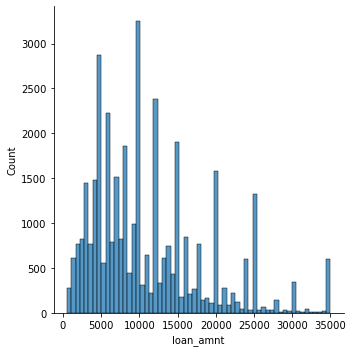

In [503]:
#checking the loan amount deviations
sns.displot(loan_cleaned['loan_amnt'])
plt.show()

In [504]:
loan_cleaned['loan_amnt_category'] = pd.cut(loan_cleaned.loan_amnt,bins=5,precision=0,labels=['0-7k','8-14k','15-21k','22-28k','29-35k'])
loan_cleaned['loan_amnt_category'].value_counts()

0-7k      14204
8-14k     12625
15-21k     6851
22-28k     2746
29-35k     1118
Name: loan_amnt_category, dtype: int64

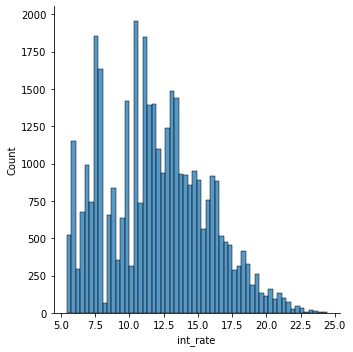

In [505]:
sns.displot(loan_cleaned['int_rate'])
plt.show()

In [506]:
loan_cleaned['int_rate_category'] = pd.cut(loan_cleaned.loan_amnt,bins=5,precision=0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_cleaned['int_rate_category'].value_counts()

5%-9%      14204
9%-13%     12625
13%-17%     6851
17%-21%     2746
21%-24%     1118
Name: int_rate_category, dtype: int64

In [507]:
loan_cleaned.shape

(37544, 26)

<AxesSubplot:xlabel='annual_inc'>

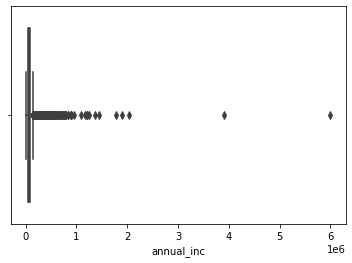

In [508]:
#checking for outliers
sns.boxplot(loan_cleaned['annual_inc'])

In [509]:
loan_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,37488.0,37544.0,37544.0,37544.0,36847.000000,37505.0
mean,11119.329986,10853.560489,10280.495739,41.917537,11.963319,324.650164,5.061048,6.940708e+04,13.284186,0.0,1.0,0.0,0.0,0.041794,0.0
std,7354.098954,7096.316776,7034.124211,10.344394,3.683012,208.901055,3.401750,6.467698e+04,6.660551,0.0,0.0,0.0,0.0,0.200799,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.370000,2.000000,4.100000e+04,8.160000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8850.000000,36.000000,11.830000,280.000000,4.000000,6.000000e+04,13.380000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14075.000000,36.000000,14.420000,428.942500,9.000000,8.300000e+04,18.550000,0.0,1.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,0.0,1.0,0.0,0.0,2.000000,0.0


In [510]:
loan_cleaned['annual_inc_category'] = pd.cut(loan_cleaned.annual_inc,bins=5,precision=0,labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_cleaned['annual_inc_category'].value_counts()

3k-31k       37536
31k-58k          6
85k-112k         1
112k-140k        1
58k-85k          0
Name: annual_inc_category, dtype: int64

In [511]:
loan_cleaned = loan_cleaned[loan_cleaned['annual_inc_category'] == '3k-31k']

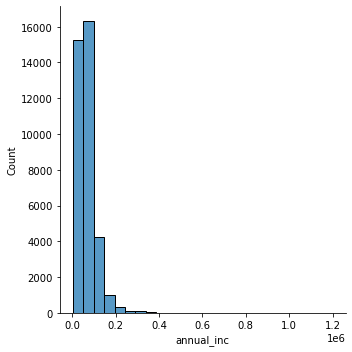

In [512]:
sns.displot(loan_cleaned['annual_inc'], bins=25)
plt.show()

In [513]:
loan_cleaned['annual_inc'].value_counts()

60000.0     1434
50000.0     1009
40000.0      838
45000.0      794
75000.0      779
            ... 
108820.0       1
85634.0        1
126996.0       1
57110.0        1
27376.0        1
Name: annual_inc, Length: 4998, dtype: int64

In [514]:
loan_cleaned['annual_inc_category'] = pd.cut(loan_cleaned.annual_inc,bins=3,precision=0,labels=['0k-1k','1k-2k','2k-10k'])
loan_cleaned['annual_inc_category'].value_counts()

0k-1k     37455
1k-2k        67
2k-10k       14
Name: annual_inc_category, dtype: int64

In [515]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37536 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   37536 non-null  int64   
 1   funded_amnt                 37536 non-null  int64   
 2   funded_amnt_inv             37536 non-null  float64 
 3   term                        37536 non-null  int32   
 4   int_rate                    37536 non-null  float64 
 5   installment                 37536 non-null  float64 
 6   grade                       37536 non-null  object  
 7   sub_grade                   37536 non-null  object  
 8   emp_length                  37536 non-null  int64   
 9   home_ownership              37536 non-null  object  
 10  annual_inc                  37536 non-null  float64 
 11  verification_status         37536 non-null  object  
 12  issue_d                     37536 non-null  object  
 13  loan_status     

In [516]:
loan_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amnt_category,int_rate_category,annual_inc_category
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,f,0.0,1,0,0,0.0,0.0,0-7k,5%-9%,0k-1k
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,f,0.0,1,0,0,0.0,0.0,0-7k,5%-9%,0k-1k
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,f,0.0,1,0,0,0.0,0.0,0-7k,5%-9%,0k-1k
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,f,0.0,1,0,0,0.0,0.0,8-14k,9%-13%,0k-1k
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,f,0.0,1,0,0,0.0,0.0,0-7k,5%-9%,0k-1k


In [517]:
#Univariate Analysis

<AxesSubplot:xlabel='grade', ylabel='count'>

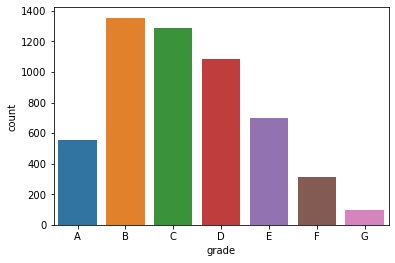

In [518]:
sns.countplot(x = 'grade', data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

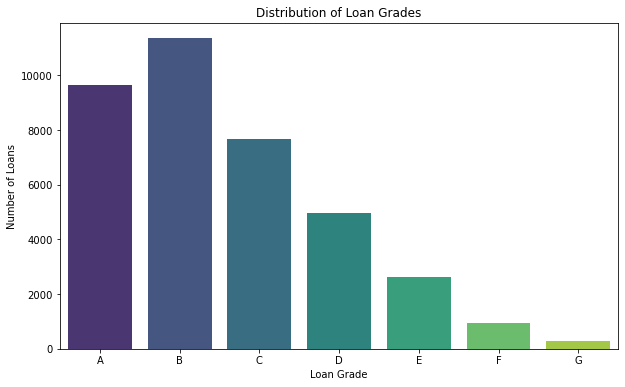

In [519]:
# Plotting the distribution of loan grades
plt.figure(figsize=(10, 6))
grade_count = loan_data_cleaned['grade'].value_counts().sort_index()
sns.barplot(x=grade_count.index, y=grade_count.values, palette="viridis")
plt.title('Distribution of Loan Grades')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Grade')
plt.show()

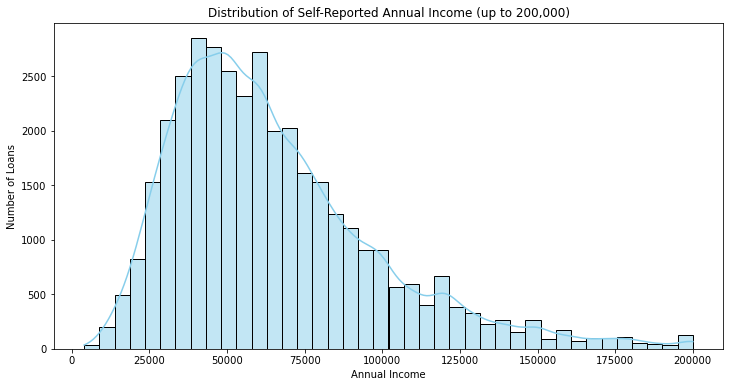

In [520]:
# Plotting the distribution of annual incomes (up to 200,000 for clarity)
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_cleaned[loan_data_cleaned['annual_inc'] <= 200000]['annual_inc'], bins=40, kde=True, color="skyblue")
plt.title('Distribution of Self-Reported Annual Income (up to 200,000)')
plt.xlabel('Annual Income')
plt.ylabel('Number of Loans')
plt.show()


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

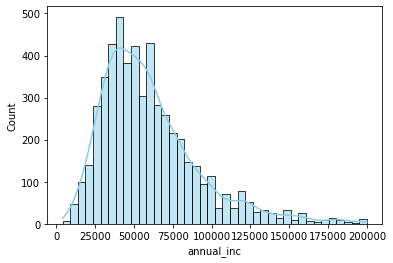

In [521]:
sns.histplot(loan_cleaned[(loan_cleaned['loan_status'] == 'Charged Off') & (loan_cleaned['annual_inc'] <= 200000)]['annual_inc'], bins=40, kde=True, color="skyblue")

In [522]:
#Observation: More defaults when 'annual_inc' upto 1k

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

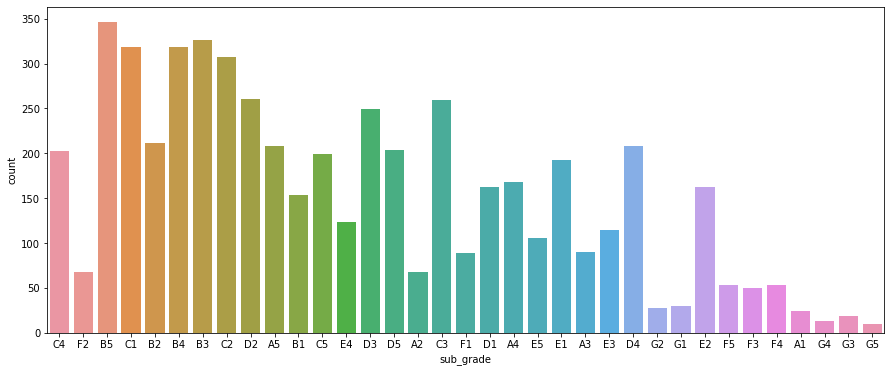

In [523]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x = 'sub_grade', data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [524]:
#Observation: More defaults for when 'grade' is 'B' and 'sub_grade' is 'B5'

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

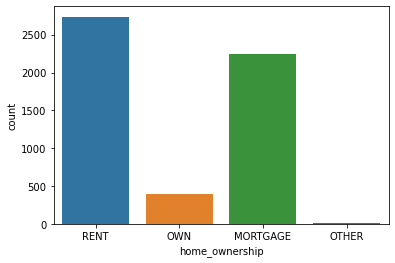

In [525]:
sns.countplot(x='home_ownership', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [526]:
#Observation: More defaults when 'home_ownership' is 'RENT' or 'MORTGAGE'

<AxesSubplot:xlabel='count', ylabel='purpose'>

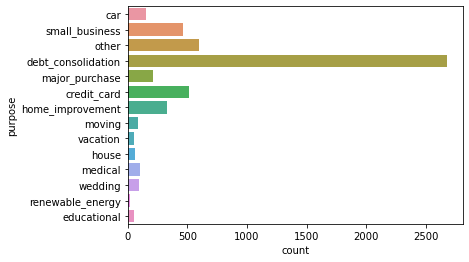

In [527]:
sns.countplot(y ='purpose', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [528]:
#Observation: More defaults when 'purpose' of loan is 'debt_consolidation'

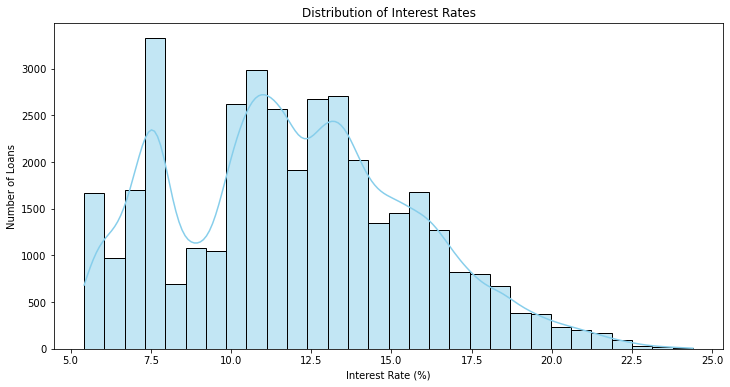

In [529]:
# Convert 'int_rate' column to float after removing the '%' sign
#loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float')

# Plotting the distribution of interest rates
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Loans')
plt.show()


<AxesSubplot:xlabel='int_rate_category', ylabel='count'>

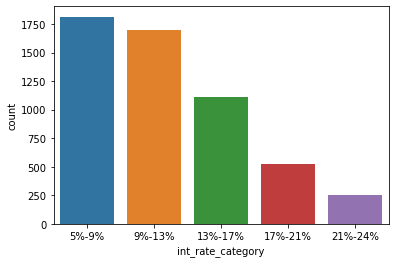

In [530]:
sns.countplot(x='int_rate_category', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [531]:
#Observation: More defaults when 'int_rate' falls in 5-9%

<AxesSubplot:xlabel='emp_length', ylabel='count'>

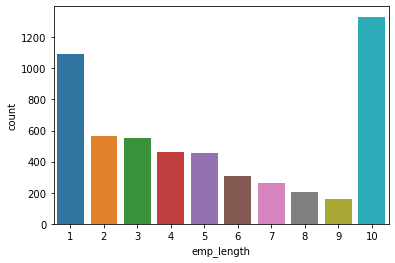

In [532]:
sns.countplot(x='emp_length', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [533]:
#Observation: More defaults when 'emp_length' of 10

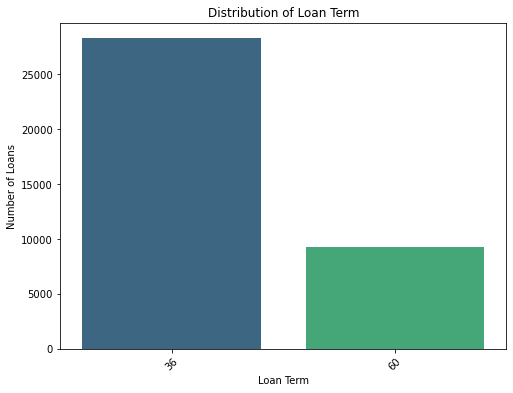

In [534]:
# Plotting the distribution of term
plt.figure(figsize=(8, 6))
term_count = loan_data_cleaned['term'].value_counts()
sns.barplot(x=term_count.index, y=term_count.values, palette="viridis")
plt.title('Distribution of Loan Term')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Term')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:xlabel='term', ylabel='count'>

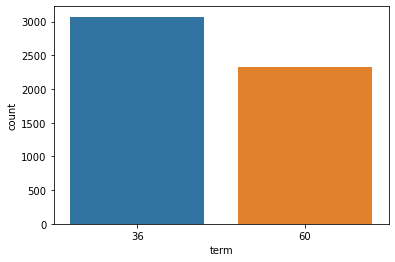

In [535]:
sns.countplot(x='term', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [536]:
#Observation: More defaults when 'term' is 36 months

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

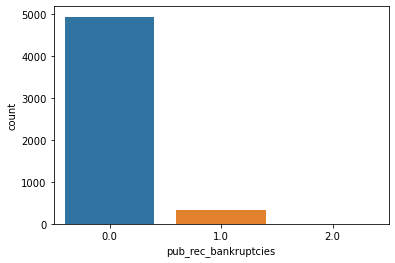

In [537]:
sns.countplot(x='pub_rec_bankruptcies', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [538]:
#Observation: More defaults when 'public_rec_bankruptcies' is 0 (suprisingly not 1)

<AxesSubplot:xlabel='installment', ylabel='Count'>

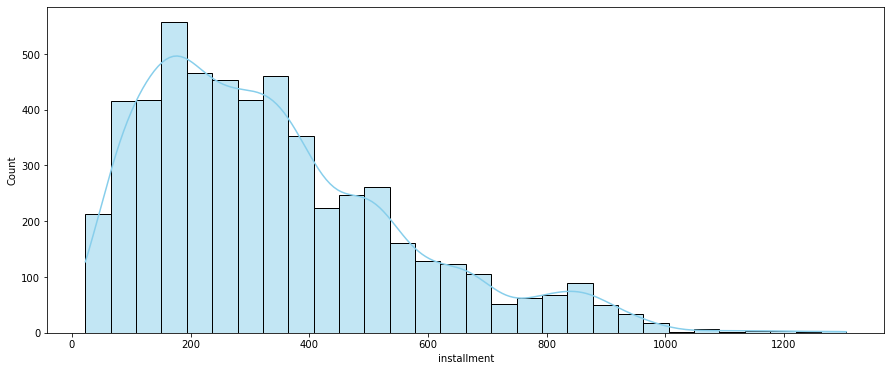

In [539]:
fig,ax = plt.subplots(figsize = (15,6))
#sns.countplot(x='installment', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])
# Filtering the dataframe for 'Charged Off' loans and plotting the distribution of 'installment'
sns.histplot(loan_cleaned[loan_cleaned['loan_status'] == 'Charged Off']['installment'], bins=30, kde=True, color="skyblue")


In [540]:
#Observation: More defaults when 'installment' are between 150 to 300

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

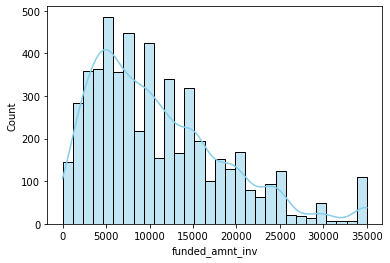

In [541]:
#sns.countplot(x='funded_amnt_inv', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])
# Filtering the dataframe for 'Charged Off' loans and plotting the distribution of 'funded_amnt_inv'
sns.histplot(loan_cleaned[loan_cleaned['loan_status'] == 'Charged Off']['funded_amnt_inv'], bins=30, kde=True, color="skyblue")


In [542]:
#Observation: More defaults when 'funded_amnt_inv' is between 5-10k

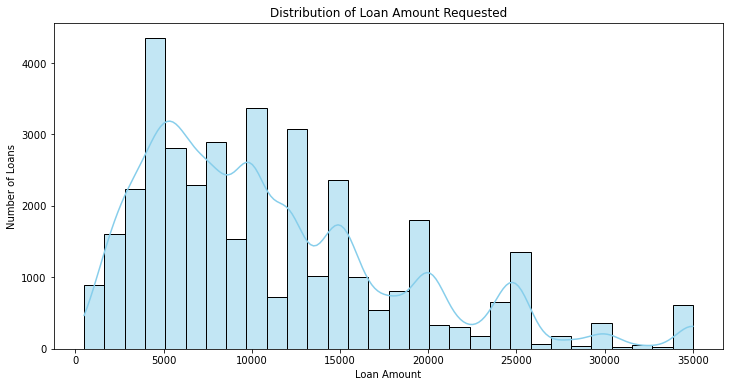

In [543]:
# Plotting the distribution of loan_amnt
loan_data_cleaned = loan_cleaned.copy()
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Loan Amount Requested')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')
plt.show()

<AxesSubplot:xlabel='loan_amnt_category', ylabel='count'>

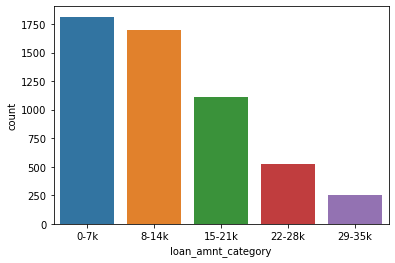

In [544]:
sns.countplot(x='loan_amnt_category', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [545]:
#Observation: More defaults when 'loan_amnt' is between 5-10k

<AxesSubplot:xlabel='dti', ylabel='Count'>

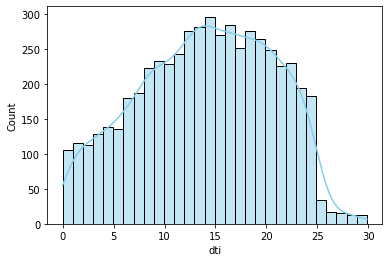

In [546]:
#sns.countplot(x='dti', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])
# Filtering the dataframe for 'Charged Off' loans and plotting the distribution of 'dti'
sns.histplot(loan_cleaned[loan_cleaned['loan_status'] == 'Charged Off']['dti'], bins=30, kde=True, color="skyblue")


In [547]:
#Observation: More defaults when 'dti' is between 12-18

<AxesSubplot:xlabel='verification_status', ylabel='count'>

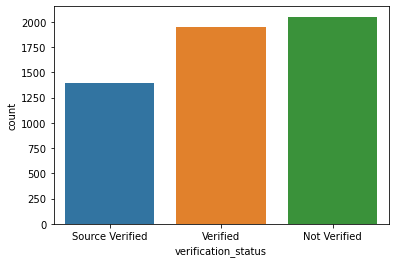

In [548]:
sns.countplot(x='verification_status', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [549]:
#Observation: More defaults when 'verification_status' is 'Not verified'

In [550]:
#Bivariate Analysis

In [551]:
#Bivariate Analysis

<AxesSubplot:xlabel='term', ylabel='purpose'>

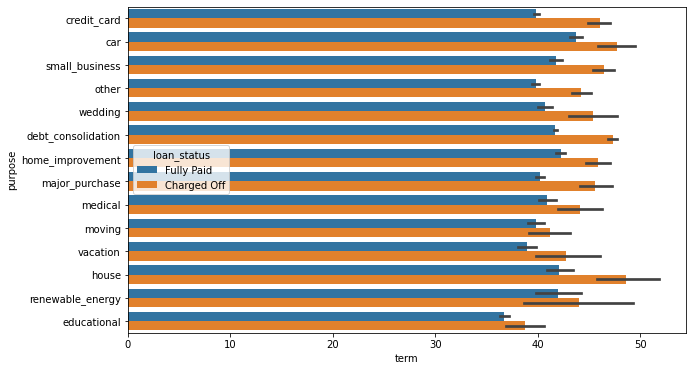

In [552]:
#Bivariate Analysis - compare the default rates across two types of categorical variables loan_status / purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="purpose", hue='loan_status', data=loan_cleaned)

In [553]:
# house, home_improvement, debt_consolidation, car with longer terms has higher default rate

In [554]:
# Analyzing annual_inc with other columns

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

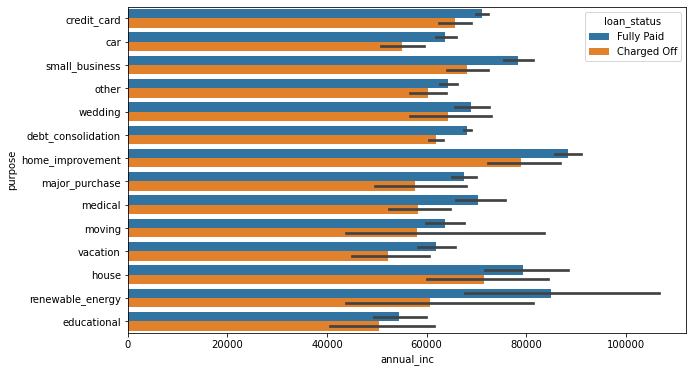

In [555]:
#annual_inc vs. purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="purpose", hue='loan_status', data=loan_cleaned)

In [556]:
# Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.
# Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
#Observation: Applicants taking loan for 'home improvement' and have income of 60k -70k (to be determined)

<AxesSubplot:xlabel='annual_inc_category', ylabel='loan_amnt'>

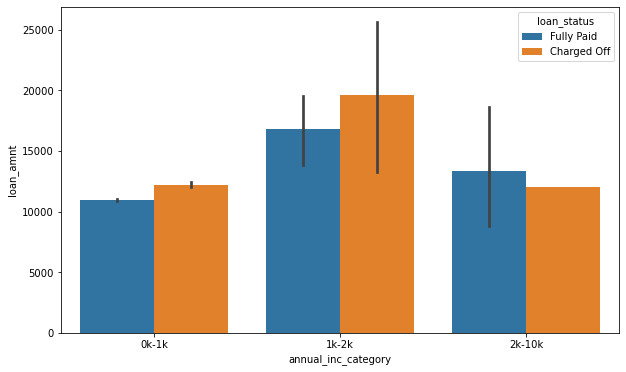

In [557]:
#annual_inc vs. loan_amnt
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc_category', y="loan_amnt", hue='loan_status', data=loan_cleaned)
#Across all the income groups, the loan_amount is higher for people who defaulted.

<AxesSubplot:xlabel='int_rate_category', ylabel='annual_inc'>

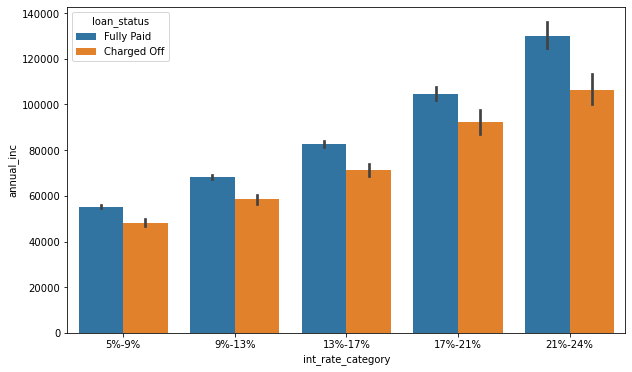

In [558]:
#annual_inc vs. int_rate
plt.figure(figsize=[10, 6])
sns.barplot(x='int_rate_category', y="annual_inc", hue='loan_status', data=loan_cleaned)

In [559]:
#Higher salary range gets loan on higher interest and higher defaults

In [560]:
#Observation: Higher defaults when Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k  (to be determined)

<AxesSubplot:xlabel='annual_inc', ylabel='home_ownership'>

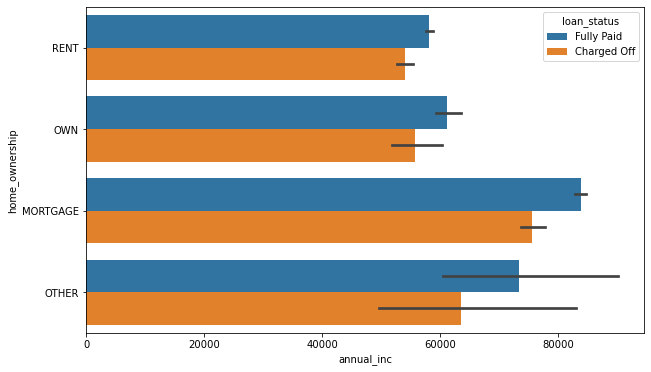

In [561]:
#annual_inc vs. home_ownership
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="home_ownership", hue='loan_status', data=loan_cleaned)

In [562]:
#defaults in REnt or mortgage and higher salary 60-90k applied for Mortgage or others
#Observation: Applicants whose home ownership is 'MORTGAGE and have income of 60-70k (to be determined)

In [563]:
#Comparing loan_amnt with other columns

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

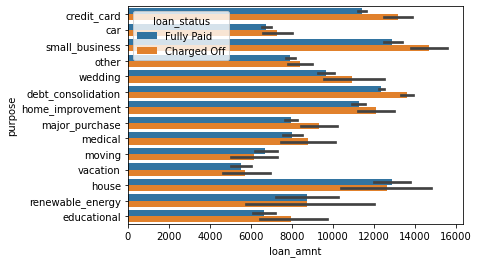

In [564]:
sns.barplot(x='loan_amnt', y="purpose", hue='loan_status', data=loan_cleaned)

<AxesSubplot:xlabel='loan_amnt_category', ylabel='int_rate'>

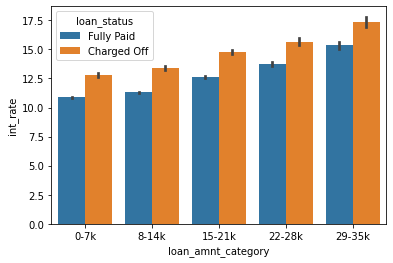

In [565]:
sns.barplot(x='loan_amnt_category', y="int_rate", hue='loan_status', data=loan_cleaned)

In [566]:
#Observation: Applicants who have taken a loan in the range 25k - 35k and are charged interest rate of 15-17.5 %

<AxesSubplot:xlabel='loan_amnt', ylabel='grade'>

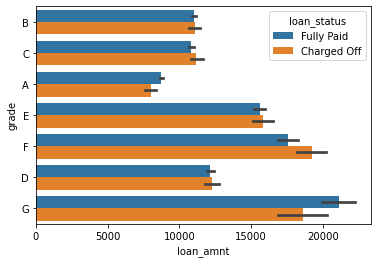

In [567]:
sns.barplot(x='loan_amnt', y="grade", hue='loan_status', data=loan_cleaned)

In [568]:
#Observation: When grade is F and loan amount is between 15k-20k

<AxesSubplot:xlabel='loan_amnt', ylabel='verification_status'>

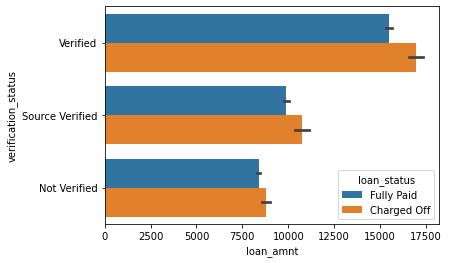

In [569]:
sns.barplot(x='loan_amnt', y="verification_status", hue='loan_status', data=loan_cleaned)

In [570]:
#Looking at the verification status data, verified loan applications tend to have higher loan amount. 
#Which might indicate that the firms are first verifying the loans with higher values
#Observation:When the loan is verified and loan amount is above 16k

<AxesSubplot:xlabel='loan_amnt', ylabel='home_ownership'>

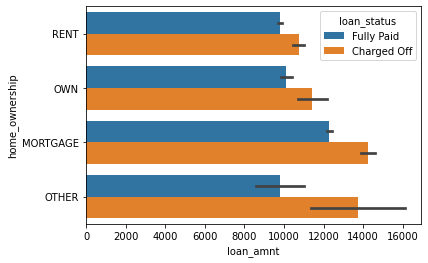

In [571]:
sns.barplot(x='loan_amnt', y="home_ownership", hue='loan_status', data=loan_cleaned)

In [572]:
#Observation: Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k

<AxesSubplot:xlabel='loan_amnt_category', ylabel='emp_length'>

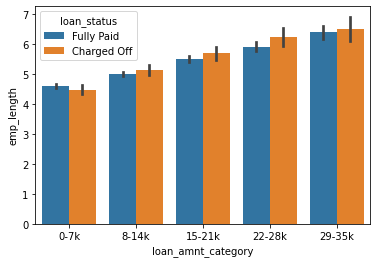

In [573]:
sns.barplot(x='loan_amnt_category', y="emp_length", hue='loan_status', data=loan_cleaned)

In [574]:
#Employees with longer working history got the loan approved for a higher amount.
#Observation: When employment length is 10yrs and loan amount is 12k-14k

<AxesSubplot:xlabel='int_rate', ylabel='grade'>

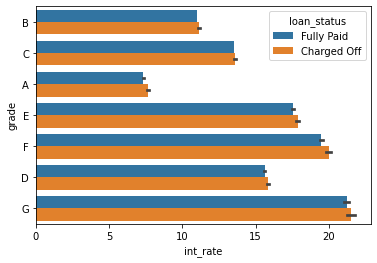

In [575]:
#int_rate vs grade
sns.barplot(x='int_rate', y="grade", hue='loan_status', data=loan_cleaned)

In [576]:
#The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
#This can be a pretty strong driving factor for loan defaulting.
#Observation: For grade G and interest rate above 20%

# Extra checks for data insights

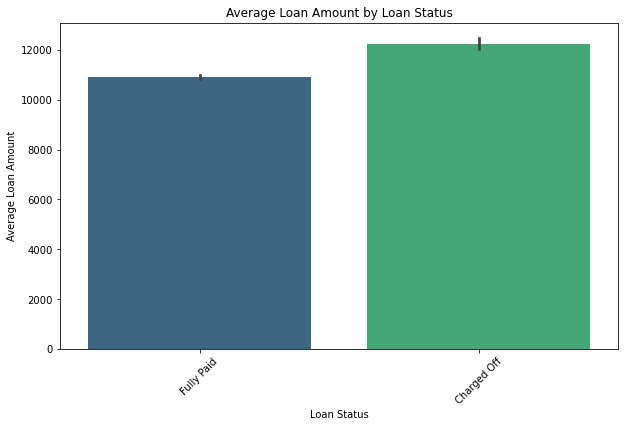

In [578]:
# Plotting the average loan amount across different loan statuses
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned, palette="viridis", estimator=lambda x: sum(x) / len(x))
plt.title('Average Loan Amount by Loan Status')
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Status')
plt.xticks(rotation=45)
plt.show()

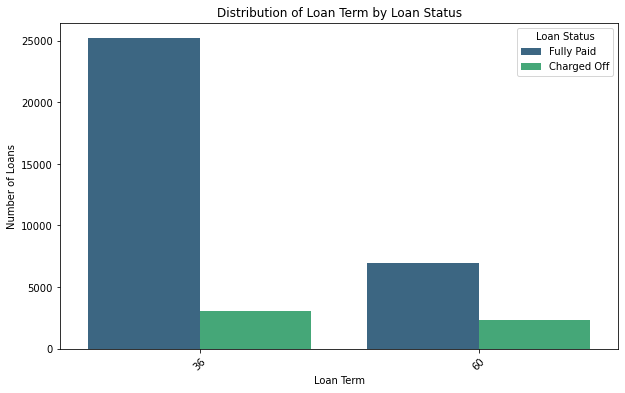

In [579]:
# Plotting the distribution of loan terms across different loan statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data_cleaned, palette="viridis")
plt.title('Distribution of Loan Term by Loan Status')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Term')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


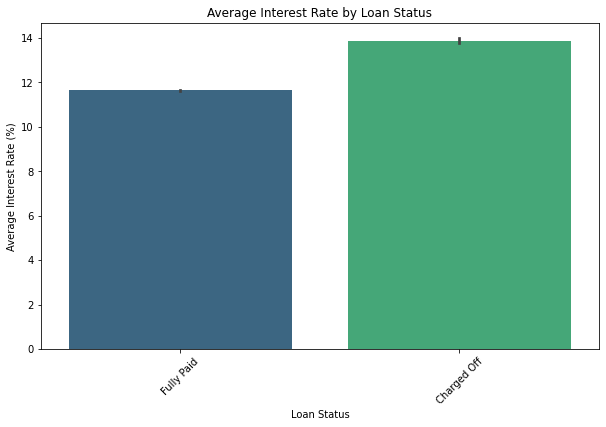

In [580]:
# Plotting the average interest rate across different loan statuses
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='int_rate', data=loan_data_cleaned, palette="viridis", estimator=lambda x: sum(x) / len(x))
plt.title('Average Interest Rate by Loan Status')
plt.ylabel('Average Interest Rate (%)')
plt.xlabel('Loan Status')
plt.xticks(rotation=45)
plt.show()

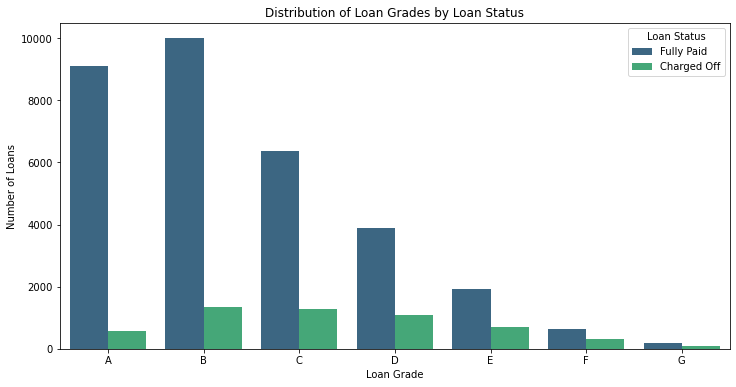

In [581]:
# Plotting the distribution of loan grades across different loan statuses
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data_cleaned, palette="viridis", order=sorted(loan_data_cleaned['grade'].unique()))
plt.title('Distribution of Loan Grades by Loan Status')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Grade')
plt.legend(title='Loan Status')
plt.show()


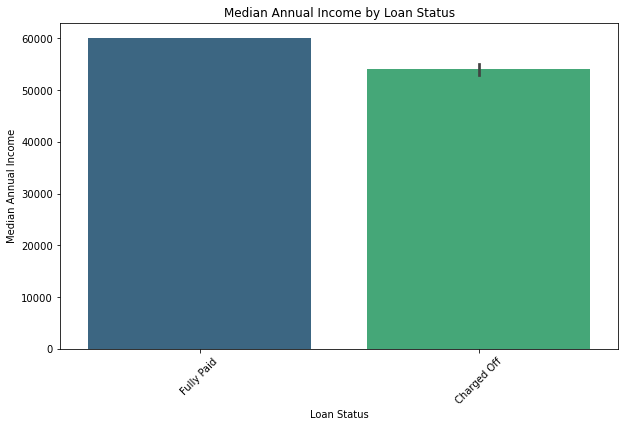

In [582]:
import numpy as np

# Plotting the median annual income across different loan statuses
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='annual_inc', data=loan_data_cleaned, palette="viridis", estimator=np.median)
plt.title('Median Annual Income by Loan Status')
plt.ylabel('Median Annual Income')
plt.xlabel('Loan Status')
plt.xticks(rotation=45)
plt.show()


# trend for month 

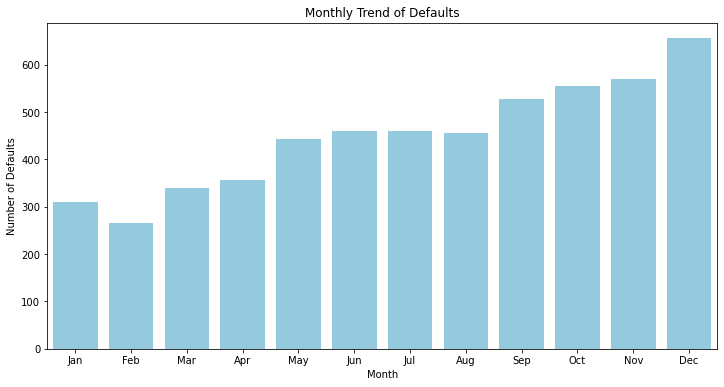

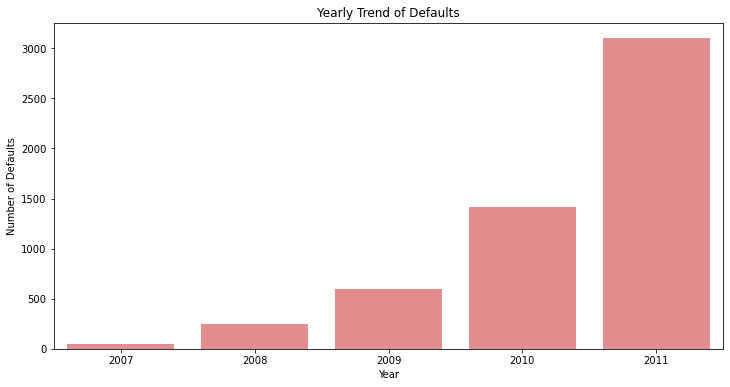

In [585]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
df = loan_data_cleaned.copy() #pd.read_csv("/mnt/data/loan.csv", low_memory=False)

# Convert 'issue_d' to datetime format
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# Extract month and year from 'issue_d'
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

# Aggregate the number of defaults ('Charged Off') for each month
monthly_defaults = df[df['loan_status'] == 'Charged Off'].groupby('month')['loan_status'].count()

# Aggregate the number of defaults ('Charged Off') for each year
yearly_defaults = df[df['loan_status'] == 'Charged Off'].groupby('year')['loan_status'].count()

# Plotting the trends

# Monthly trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_defaults.index, y=monthly_defaults.values, color="skyblue")
plt.title('Monthly Trend of Defaults')
plt.xlabel('Month')
plt.ylabel('Number of Defaults')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Yearly trend
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_defaults.index, y=yearly_defaults.values, color="lightcoral")
plt.title('Yearly Trend of Defaults')
plt.xlabel('Year')
plt.ylabel('Number of Defaults')
plt.show()


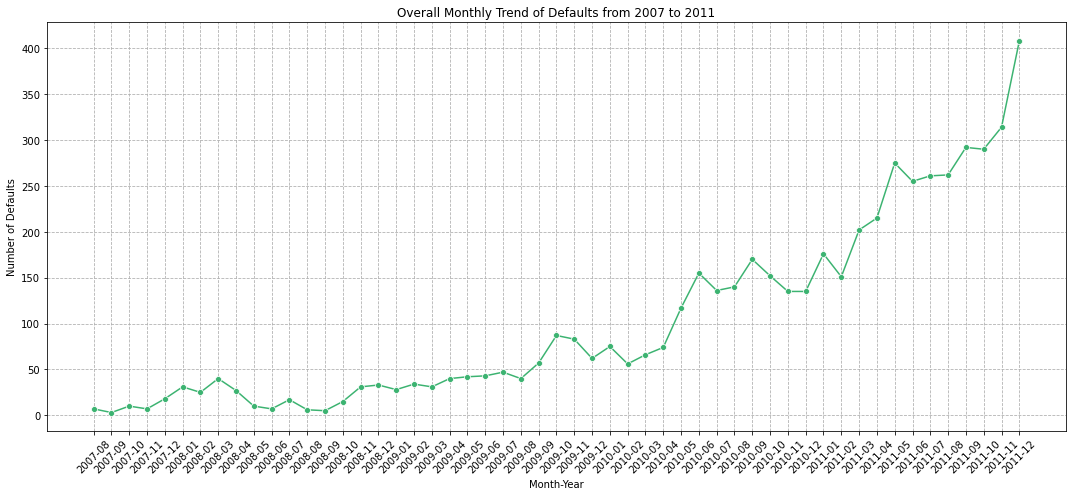

In [586]:
# Create a combined month-year column in the format YYYY-MM
df['month_year'] = df['issue_d'].dt.strftime('%Y-%m')

# Aggregate the number of defaults ('Charged Off') for each month from 2007 to 2011
month_year_defaults = df[df['loan_status'] == 'Charged Off'].groupby('month_year')['loan_status'].count()

# Plotting the overall trend from 2007 to 2011
plt.figure(figsize=(15, 7))
sns.lineplot(x=month_year_defaults.index, y=month_year_defaults.values, marker="o", color="mediumseagreen")
plt.title('Overall Monthly Trend of Defaults from 2007 to 2011')
plt.xlabel('Month-Year')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()
